# Data Visualization Project
## Is higher education in Italy affected by COVID?
---
### 1. IMPORTS AND CONFIGURATION

In [53]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Matplotlib and Seaborn configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✓ Libraries imported successfully")
print("✓ Configuration set")

✓ Libraries imported successfully
✓ Configuration set


---  
### 2. DATA LOADING

In [54]:
# 
enrollments_file = './Data/educ_uoe_enrt03__custom_19727726_linear_2_0.csv'
graduates_file = './Data/educ_uoe_grad02__custom_19727646_linear_2_0.csv'

# Load enrollments data
try:
    df_enrollments = pd.read_csv(enrollments_file)
    print(f"✓ Enrollments loaded: {df_enrollments.shape[0]:,} rows × {df_enrollments.shape[1]} columns")
except FileNotFoundError:
    print(f"✗ Error: File '{enrollments_file}' not found!")
    print("  Please ensure the file is in the same directory as this notebook")
# Clear columns names from any suffix after colon
df_enrollments.columns = df_enrollments.columns.str.split(":", n=1).str[0]

# Load graduates data
try:
    df_graduates = pd.read_csv(graduates_file)
    print(f"✓ Graduates loaded: {df_graduates.shape[0]:,} rows × {df_graduates.shape[1]} columns")
except FileNotFoundError:
    print(f"✗ Error: File '{graduates_file}' not found!")
    print("  Please ensure the file is in the same directory as this notebook")
# Clear columns names from any suffix after colon
df_graduates.columns = df_graduates.columns.str.split(":", n=1).str[0]

# Display first rows of each dataset
print("\n--- Enrollments Sample (first 5 rows) ---")
display(df_enrollments.head(5))

print("\n--- Graduates Sample (first 5 rows) ---")
display(df_graduates.head(5))

✓ Enrollments loaded: 10,618 rows × 12 columns
✓ Graduates loaded: 34,498 rows × 12 columns

--- Enrollments Sample (first 5 rows) ---


,STRUCTURE,STRUCTURE_ID,freq,unit,iscedf13,isced11,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,dataflow,ESTAT:EDUC_UOE_ENRT03(1.0),A: Annual,NR: Number,F00: Generic programmes and qualifications,ED5: Short-cycle tertiary education,F: Females,IT: Italy,2015,NaN,d: definition differs (see metadata),NaN
1,dataflow,ESTAT:EDUC_UOE_ENRT03(1.0),A: Annual,NR: Number,F00: Generic programmes and qualifications,ED5: Short-cycle tertiary education,F: Females,IT: Italy,2016,0.00,NaN,NaN
2,dataflow,ESTAT:EDUC_UOE_ENRT03(1.0),A: Annual,NR: Number,F00: Generic programmes and qualifications,ED5: Short-cycle tertiary education,F: Females,IT: Italy,2017,0.00,NaN,NaN
3,dataflow,ESTAT:EDUC_UOE_ENRT03(1.0),A: Annual,NR: Number,F00: Generic programmes and qualifications,ED5: Short-cycle tertiary education,F: Females,IT: Italy,2018,0.00,NaN,NaN
4,dataflow,ESTAT:EDUC_UOE_ENRT03(1.0),A: Annual,NR: Number,F00: Generic programmes and qualifications,ED5: Short-cycle tertiary education,F: Females,IT: Italy,2019,0.00,NaN,NaN



--- Graduates Sample (first 5 rows) ---


,STRUCTURE,STRUCTURE_ID,freq,unit,isced11,iscedf13,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,dataflow,ESTAT:EDUC_UOE_GRAD02(1.0),A: Annual,NR: Number,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,F: Females,IT: Italy,2015,0.00,NaN,NaN
1,dataflow,ESTAT:EDUC_UOE_GRAD02(1.0),A: Annual,NR: Number,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,F: Females,IT: Italy,2016,0.00,NaN,NaN
2,dataflow,ESTAT:EDUC_UOE_GRAD02(1.0),A: Annual,NR: Number,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,F: Females,IT: Italy,2017,0.00,d: definition differs (see metadata),NaN
3,dataflow,ESTAT:EDUC_UOE_GRAD02(1.0),A: Annual,NR: Number,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,F: Females,IT: Italy,2018,0.00,d: definition differs (see metadata),NaN
4,dataflow,ESTAT:EDUC_UOE_GRAD02(1.0),A: Annual,NR: Number,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,F: Females,IT: Italy,2019,0.00,d: definition differs (see metadata),NaN


---  
### 3. PREPROCESSING
#### 3.1 Reduction of variables to only those necessary for the study

In [55]:
# Kepp only relevant columns
cols_keep = [
    "TIME_PERIOD",
    "sex",
    "isced11",
    "iscedf13",
    "OBS_VALUE",
    "OBS_FLAG",
]

df_enr = df_enrollments[cols_keep].copy()
df_grad = df_graduates[cols_keep].copy()

# Some checks
print("\n--- Enrollments Sample (first 5 rows) ---")
display(df_enr.head(5))

print("\n--- Graduates Sample (first 5 rows) ---")
display(df_grad.head(5))


--- Enrollments Sample (first 5 rows) ---


,TIME_PERIOD,sex,isced11,iscedf13,OBS_VALUE,OBS_FLAG
0,2015,F: Females,ED5: Short-cycle tertiary education,F00: Generic programmes and qualifications,NaN,d: definition differs (see metadata)
1,2016,F: Females,ED5: Short-cycle tertiary education,F00: Generic programmes and qualifications,0.00,NaN
2,2017,F: Females,ED5: Short-cycle tertiary education,F00: Generic programmes and qualifications,0.00,NaN
3,2018,F: Females,ED5: Short-cycle tertiary education,F00: Generic programmes and qualifications,0.00,NaN
4,2019,F: Females,ED5: Short-cycle tertiary education,F00: Generic programmes and qualifications,0.00,NaN



--- Graduates Sample (first 5 rows) ---


,TIME_PERIOD,sex,isced11,iscedf13,OBS_VALUE,OBS_FLAG
0,2015,F: Females,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,0.00,NaN
1,2016,F: Females,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,0.00,NaN
2,2017,F: Females,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,0.00,d: definition differs (see metadata)
3,2018,F: Females,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,0.00,d: definition differs (see metadata)
4,2019,F: Females,ED35: Upper secondary education - vocational,F00: Generic programmes and qualifications,0.00,d: definition differs (see metadata)


---  
#### 3.2 Data typing and column renaming

In [56]:
def clean_df(df, value_name):
    df = df.rename(columns={
        "TIME_PERIOD": "year",
        "OBS_VALUE": value_name,
        "OBS_FLAG": "obs_flag"
    })
    
    df["year"] = df["year"].astype(int)
    df[value_name] = pd.to_numeric(df[value_name], errors="coerce")
    
    return df

df_enr = clean_df(df_enr, "enrolled")
df_grad = clean_df(df_grad, "graduated")

# Some checks
print("\n--- Enrollments Sample (5 rows) ---")
display(df_enr.sample(5))

print("\n--- Graduates Sample (5 rows) ---")
display(df_grad.sample(5))


--- Enrollments Sample (5 rows) ---


,year,sex,isced11,iscedf13,enrolled,obs_flag
3752,2019,T: Total,ED6: Bachelor's or equivalent level,F041: Business and administration,142488.00,NaN
3604,2023,T: Total,ED6: Bachelor's or equivalent level,"F040: Business, administration and law not fur...",787.00,NaN
2227,2018,T: Total,ED6: Bachelor's or equivalent level,F028: Inter-disciplinary programmes and qualif...,37412.00,NaN
3667,2021,F: Females,ED5: Short-cycle tertiary education,F041: Business and administration,900.00,NaN
8420,2023,M: Males,ED6: Bachelor's or equivalent level,F09: Health and welfare,28773.00,NaN



--- Graduates Sample (5 rows) ---


,year,sex,isced11,iscedf13,graduated,obs_flag
33160,2019,F: Females,ED8: Doctoral or equivalent level,F084: Veterinary,62.00,NaN
15511,2015,T: Total,ED5-8: Tertiary education (levels 5-8),"F040: Business, administration and law not fur...",NaN,d: definition differs (see metadata)
8346,2022,F: Females,ED45: Post-secondary non-tertiary education - ...,F10: Services,123.00,NaN
10432,2013,F: Females,ED5: Short-cycle tertiary education,F041: Business and administration,17.00,NaN
14840,2016,T: Total,ED5-8: Tertiary education (levels 5-8),F023: Languages,NaN,d: definition differs (see metadata)


#### 3.3 Data normalization in sex field
I will use only `Male` and `Femail`, excluding `Total`

In [57]:
sex_map = {
    "F: Females": "Female",
    "M: Males": "Male",
    "T: Total": "Total"
}

df_enr["sex"] = df_enr["sex"].map(sex_map)
df_grad["sex"] = df_grad["sex"].map(sex_map)

# Filter only females and males
df_enr = df_enr[df_enr["sex"].isin(["Female", "Male"])]
df_grad = df_grad[df_grad["sex"].isin(["Female", "Male"])]

# Some checks
print("\n--- Enrollments Sample (5 rows) ---")
display(df_enr.sample(5))

print("\n--- Graduates Sample (5 rows) ---")
display(df_grad.sample(5))


--- Enrollments Sample (5 rows) ---


,year,sex,isced11,iscedf13,enrolled,obs_flag
7946,2023,Female,ED6: Bachelor's or equivalent level,F084: Veterinary,48.00,NaN
10028,2018,Female,ED5-8: Tertiary education (levels 5-8),F104: Transport services,NaN,d: definition differs (see metadata)
5094,2022,Male,ED5: Short-cycle tertiary education,F054: Mathematics and statistics,0.00,NaN
6697,2016,Female,ED6: Bachelor's or equivalent level,F073: Architecture and construction,19098.00,NaN
5083,2022,Female,ED5: Short-cycle tertiary education,F054: Mathematics and statistics,0.00,NaN



--- Graduates Sample (5 rows) ---


,year,sex,isced11,iscedf13,graduated,obs_flag
1082,2017,Female,ED35: Upper secondary education - vocational,"F030: Social sciences, journalism and informat...",0.00,d: definition differs (see metadata)
1346,2023,Male,ED35: Upper secondary education - vocational,F0320: Journalism and information not further ...,NaN,d: definition differs (see metadata)
18712,2021,Female,ED5-8: Tertiary education (levels 5-8),F1022: Occupational health and safety,0.00,NaN
8724,2022,Female,ED45: Post-secondary non-tertiary education - ...,F1032: Protection of persons and property,NaN,d: definition differs (see metadata)
10530,2017,Male,ED5: Short-cycle tertiary education,"F0412: Finance, banking and insurance",0.00,NaN


#### 3.4 ISCED: explicit separation between code and description

In [58]:
# Function definition
def split_isced(x):
    """
    Input: 'ED5: Short-cycle tertiary education'
    Output: ('ED5', 'Short-cycle tertiary education')
    """
    if pd.isna(x):
        return pd.Series([np.nan, np.nan])
    
    code, desc = x.split(": ", 1)
    return pd.Series([code, desc])

In [59]:
for field in ["isced11", "iscedf13"]:
    df_enr[[f"{field}_code", f"{field}_desc"]] = df_enr[field].apply(split_isced)
    df_grad[[f"{field}_code", f"{field}_desc"]] = df_grad[field].apply(split_isced)

df_enr.drop(columns=["isced11", "iscedf13"], inplace=True)
df_grad.drop(columns=["isced11", "iscedf13"], inplace=True)

# Some checks
print("\n--- Enrollments Sample (5 rows) ---")
display(df_enr.sample(5))

print("\n--- Graduates Sample (5 rows) ---")
display(df_grad.sample(5))


--- Enrollments Sample (5 rows) ---


,year,sex,enrolled,obs_flag,isced11_code,isced11_desc,iscedf13_code,iscedf13_desc
4700,2019,Male,5966.00,NaN,ED7,Master's or equivalent level,F051,Biological and related sciences
7457,2013,Male,5648.00,NaN,ED6,Bachelor's or equivalent level,F081,Agriculture
8443,2013,Male,65508.00,NaN,ED7,Master's or equivalent level,F09,Health and welfare
125,2023,Male,0.00,NaN,ED8,Doctoral or equivalent level,F00,Generic programmes and qualifications
5495,2018,Male,0.00,NaN,ED7,Master's or equivalent level,F059,"Natural sciences, mathematics and statistics n..."



--- Graduates Sample (5 rows) ---


,year,sex,graduated,obs_flag,isced11_code,isced11_desc,iscedf13_code,iscedf13_desc
14150,2014,Female,20193.00,NaN,ED5-8,Tertiary education (levels 5-8),F011,Education
27427,2023,Male,447.00,NaN,ED7,Master's or equivalent level,F072,Manufacturing and processing
32882,2016,Male,NaN,d: definition differs (see metadata),ED8,Doctoral or equivalent level,F079,"Engineering, manufacturing and construction no..."
29638,2021,Female,0.00,NaN,ED8,Doctoral or equivalent level,F0110,Education not further defined
9514,2018,Female,0.00,NaN,ED5,Short-cycle tertiary education,F0215,Music and performing arts


#### 3.5 Comparison of ISCED codes present in the two datasets

In [60]:
# ISCED11

isced11_enr = set(df_enr["isced11_code"].dropna().unique())
isced11_grad = set(df_grad["isced11_code"].dropna().unique())

only_enr_11 = isced11_enr - isced11_grad
only_grad_11 = isced11_grad - isced11_enr
common_11 = isced11_enr & isced11_grad

only_enr_11, only_grad_11, common_11


(set(), {'ED35', 'ED45'}, {'ED5', 'ED5-8', 'ED6', 'ED7', 'ED8'})

In [61]:
# ISCEDF13

iscedf_enr = set(df_enr["iscedf13_code"].dropna().unique())
iscedf_grad = set(df_grad["iscedf13_code"].dropna().unique())

only_enr_f = iscedf_enr - iscedf_grad
only_grad_f = iscedf_grad - iscedf_enr
common_f = iscedf_enr & iscedf_grad

only_enr_f, only_grad_f, common_f


(set(),
 {'F0110',
  'F0111',
  'F0112',
  'F0113',
  'F0114',
  'F0119',
  'F0210',
  'F0211',
  'F0212',
  'F0213',
  'F0214',
  'F0215',
  'F0219',
  'F0220',
  'F0221',
  'F0222',
  'F0223',
  'F0229',
  'F0230',
  'F0231',
  'F0232',
  'F0239',
  'F0310',
  'F0311',
  'F0312',
  'F0313',
  'F0314',
  'F0319',
  'F0320',
  'F0321',
  'F0322',
  'F0329',
  'F0410',
  'F0411',
  'F0412',
  'F0413',
  'F0414',
  'F0415',
  'F0416',
  'F0417',
  'F0419',
  'F0510',
  'F0511',
  'F0512',
  'F0519',
  'F0520',
  'F0521',
  'F0522',
  'F0529',
  'F0530',
  'F0531',
  'F0532',
  'F0533',
  'F0539',
  'F0540',
  'F0541',
  'F0542',
  'F0610',
  'F0611',
  'F0612',
  'F0613',
  'F0619',
  'F0710',
  'F0711',
  'F0712',
  'F0713',
  'F0714',
  'F0715',
  'F0716',
  'F0719',
  'F0720',
  'F0721',
  'F0722',
  'F0723',
  'F0724',
  'F0729',
  'F0730',
  'F0731',
  'F0732',
  'F0810',
  'F0811',
  'F0812',
  'F0819',
  'F0910',
  'F0911',
  'F0912',
  'F0913',
  'F0914',
  'F0915',
  'F0916',
  

#### 3.6 Filter only tertiary education (ISCED 11: ED5–ED8)

In [62]:
TERTIARY_CODES = {"ED5", "ED6", "ED7", "ED8"}

df_enr = df_enr[df_enr["isced11_code"].isin(TERTIARY_CODES)]
df_grad = df_grad[df_grad["isced11_code"].isin(TERTIARY_CODES)]
# Some checks
print("\n--- Enrollments Sample (5 rows) ---")
display(df_enr.sample(5))

print("\n--- Graduates Sample (5 rows) ---")
display(df_grad.sample(5))


--- Enrollments Sample (5 rows) ---


,year,sex,enrolled,obs_flag,isced11_code,isced11_desc,iscedf13_code,iscedf13_desc
1567,2017,Female,0.00,NaN,ED6,Bachelor's or equivalent level,F020,Arts and humanities not further defined
5988,2019,Male,0.00,NaN,ED8,Doctoral or equivalent level,F068,Inter-disciplinary programmes and qualificatio...
8441,2022,Female,126198.00,NaN,ED7,Master's or equivalent level,F09,Health and welfare
5925,2019,Female,0.00,NaN,ED6,Bachelor's or equivalent level,F068,Inter-disciplinary programmes and qualificatio...
3036,2021,Female,0.00,NaN,ED8,Doctoral or equivalent level,F032,Journalism and information



--- Graduates Sample (5 rows) ---


,year,sex,graduated,obs_flag,isced11_code,isced11_desc,iscedf13_code,iscedf13_desc
9797,2016,Male,0.00,NaN,ED5,Short-cycle tertiary education,F0231,Language acquisition
28762,2017,Male,0.00,NaN,ED7,Master's or equivalent level,F101,Personal services
31070,2019,Male,12.00,NaN,ED8,Doctoral or equivalent level,F0412,"Finance, banking and insurance"
20163,2023,Female,0.00,NaN,ED6,Bachelor's or equivalent level,F030,"Social sciences, journalism and information no..."
34319,2016,Female,NaN,d: definition differs (see metadata),ED8,Doctoral or equivalent level,F1039,Security services not elsewhere classified


In [63]:
# CED5–8 Aggregator Removal Check
display(df_enr[df_enr["isced11_code"] == "ED5-8"])
display(df_grad[df_grad["isced11_code"] == "ED5-8"])

,year,sex,enrolled,obs_flag,isced11_code,isced11_desc,iscedf13_code,iscedf13_desc


,year,sex,graduated,obs_flag,isced11_code,isced11_desc,iscedf13_code,iscedf13_desc


#### 3.7 Separating root and sub classes of ISCEDF codes

In [64]:
# Function definition
def split_root_sub(df, value_col):
    root = df[df["iscedf13_code"].str.len() == 3].copy()
    sub  = df[df["iscedf13_code"].str.len() > 3].copy()
    return root, sub

In [65]:
df_enr_root, df_enr_sub = split_root_sub(df_enr, "enrolled")
df_grad_root, df_grad_sub = split_root_sub(df_grad, "graduated")

#### 3.8 Check data existence by year and category

In [66]:
CHECK_COLS = ["year", "sex", "isced11_code", "iscedf13_code"]

def build_presence_check(df_enr, df_grad):
    enr_presence = (
        df_enr
        .assign(enr_present=~df_enr["enrolled"].isna())
        .groupby(CHECK_COLS, as_index=False)["enr_present"]
        .any()
    )

    grad_presence = (
        df_grad
        .assign(grad_present=~df_grad["graduated"].isna())
        .groupby(CHECK_COLS, as_index=False)["grad_present"]
        .any()
    )

    presence_check = (
        enr_presence
        .merge(grad_presence, on=CHECK_COLS, how="outer")
        .fillna(False)
    )

    missing_combinations = presence_check[
        (~presence_check["enr_present"]) |
        (~presence_check["grad_present"])
    ]

    return presence_check, missing_combinations


In [67]:
# ROOT
presence_root, missing_root = build_presence_check(
    df_enr_root, df_grad_root
)

# SUB
presence_sub, missing_sub = build_presence_check(
    df_enr_sub, df_grad_sub
)

print("ROOT – missing combinations:")
print(missing_root.shape)
display(missing_root)

print("SUB – missing combinations:")
print(missing_sub.shape)
display(missing_sub)


ROOT – missing combinations:
(66, 6)


,year,sex,isced11_code,iscedf13_code,enr_present,grad_present
4,2013,Female,ED5,F05,False,True
6,2013,Female,ED5,F07,False,True
9,2013,Female,ED5,F10,False,True
10,2013,Female,ED5,UNK,True,False
21,2013,Female,ED6,UNK,True,False
32,2013,Female,ED7,UNK,True,False
48,2013,Male,ED5,F05,False,True
50,2013,Male,ED5,F07,False,True
53,2013,Male,ED5,F10,False,True
54,2013,Male,ED5,UNK,True,False


SUB – missing combinations:
(8960, 6)


,year,sex,isced11_code,iscedf13_code,enr_present,grad_present
0,2013,Female,ED5,F001,True,False
1,2013,Female,ED5,F002,True,False
2,2013,Female,ED5,F003,True,False
3,2013,Female,ED5,F011,False,True
4,2013,Female,ED5,F018,False,False
...,...,...,...,...,...,...
12795,2023,Male,ED8,F1030,False,True
12796,2023,Male,ED8,F1031,False,True
12797,2023,Male,ED8,F1032,False,True
12798,2023,Male,ED8,F1039,False,True


#### 3.9 Conservative cleanup: removing records with missing counts

In [68]:
df_enr_root_clean = df_enr_root.dropna(subset=["enrolled"]).copy()
df_enr_sub_clean  = df_enr_sub.dropna(subset=["enrolled"]).copy()
df_grad_root_clean = df_grad_root.dropna(subset=["graduated"]).copy()
df_grad_sub_clean  = df_grad_sub.dropna(subset=["graduated"]).copy()


##### 3.9.1 Check data existence by year and category after cleaning

In [69]:
# ROOT CLEAN
presence_root_c, missing_root_c = build_presence_check(
    df_enr_root_clean, df_grad_root_clean
)

# SUB CLEAN
presence_sub_c, missing_sub_c = build_presence_check(
    df_enr_sub_clean, df_grad_sub_clean
)

print("ROOT – missing combinations:")
print(missing_root_c.shape)
display(missing_root_c.sample(5))

print("SUB – missing combinations:")
print(missing_sub_c.shape)
display(missing_sub_c.sample(5))

ROOT – missing combinations:
(64, 6)


,year,sex,isced11_code,iscedf13_code,enr_present,grad_present
1019,2015,Female,ED5,F03,False,True
998,2014,Female,ED5,F09,False,True
1036,2015,Male,ED5,F09,False,True
29,2013,Female,ED7,UNK,True,False
1027,2015,Male,ED5,F00,False,True


SUB – missing combinations:
(7496, 6)


,year,sex,isced11_code,iscedf13_code,enr_present,grad_present
5101,2016,Female,ED7,F1012,False,True
8156,2020,Female,ED8,F1010,False,True
8996,2021,Female,ED8,F0411,False,True
3872,2013,Female,ED5,F081,False,True
8530,2020,Male,ED8,F0231,False,True


In [70]:
codes_root = set(df_enr_root_clean["iscedf13_code"].unique()) & \
             set(df_grad_root_clean["iscedf13_code"].unique())

codes_sub = set(df_enr_sub_clean["iscedf13_code"].unique()) & \
            set(df_grad_sub_clean["iscedf13_code"].unique())

print("Total ROOT code enr:", len(set(df_enr_root_clean["iscedf13_code"].unique())))
print("Total ROOT code grad:", len(set(df_grad_root_clean["iscedf13_code"].unique())))
print("Common ROOT codes:", len(codes_root))
print("\n")
print("Total SUB code enr:", len(set(df_enr_sub_clean["iscedf13_code"].unique())))
print("Total SUB code grad:", len(set(df_grad_sub_clean["iscedf13_code"].unique())))
print("Common SUB codes:", len(codes_sub))
print("\n")
print("ROOT common codes:", sorted(codes_root))
print("SUB common codes:", sorted(codes_sub))


Total ROOT code enr: 12
Total ROOT code grad: 12
Common ROOT codes: 12


Total SUB code enr: 57
Total SUB code grad: 170
Common SUB codes: 57


ROOT common codes: ['F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'UNK']
SUB common codes: ['F000', 'F001', 'F002', 'F003', 'F009', 'F011', 'F018', 'F020', 'F021', 'F022', 'F023', 'F028', 'F029', 'F030', 'F031', 'F032', 'F038', 'F039', 'F040', 'F041', 'F042', 'F048', 'F049', 'F050', 'F051', 'F052', 'F053', 'F054', 'F058', 'F059', 'F061', 'F068', 'F070', 'F071', 'F072', 'F073', 'F078', 'F079', 'F080', 'F081', 'F082', 'F083', 'F084', 'F088', 'F089', 'F090', 'F091', 'F092', 'F098', 'F099', 'F100', 'F101', 'F102', 'F103', 'F104', 'F108', 'F109']


### 4. Aggregation  
From this point I will use the cleaned ROOT dataframe for analysis and visualizations, they will be divided into macro-classes

In [71]:
df_enr_final = df_enr_root_clean.copy()
df_grad_final = df_grad_root_clean.copy()

In [72]:
# Central Mapping Dictionary to merge ISCEDF codes in 5 macro classes (Single Source of Truth)
ISCEDF_MAP = {
    "F00": "Cross-disciplinary",   # Generic programmes and qualifications
    "F01": "Cross-disciplinary",   # Education
    "F02": "Humanities",   # Arts and humanities
    "F03": "Soft Sciences",   # Social sciences, journalism and information
    "F04": "Soft Sciences",        # Business, administration and law
    "F05": "STEM",   # Natural sciences, mathematics and statistics
    "F06": "STEM",   # ICTs
    "F07": "STEM",   # Engineering, manufacturing and construction
    "F08": "Life & Health Sciences",        # Agriculture, forestry, fisheries and veterinary
    "F09": "Life & Health Sciences",   # Health and welfare
    "F10": "Cross-disciplinary"         # Services
}


#### 4.1 Macro-area assignment to each record

In [73]:
def assign_macro_area(root_code):
    return ISCEDF_MAP.get(root_code, "Unknown")

df_enr_final["macro_area"] = df_enr_final["iscedf13_code"].apply(assign_macro_area)
df_grad_final["macro_area"] = df_grad_final["iscedf13_code"].apply(assign_macro_area)

# some checks
print("\n--- Enrollments Final Sample (5 rows) ---")
display(df_enr_final.sample(5))
print("\n--- Graduates Final Sample (5 rows) ---")
display(df_grad_final.sample(5))




--- Enrollments Final Sample (5 rows) ---


,year,sex,enrolled,obs_flag,isced11_code,isced11_desc,iscedf13_code,iscedf13_desc,macro_area
2,2017,Female,0.00,NaN,ED5,Short-cycle tertiary education,F00,Generic programmes and qualifications,Cross-disciplinary
996,2022,Female,359.00,NaN,ED8,Doctoral or equivalent level,F01,Education,Cross-disciplinary
10562,2023,Female,3669.00,NaN,ED7,Master's or equivalent level,UNK,Unknown,Unknown
7149,2015,Female,14890.00,NaN,ED6,Bachelor's or equivalent level,F08,"Agriculture, forestry, fisheries and veterinary",Life & Health Sciences
3430,2018,Female,69534.00,NaN,ED6,Bachelor's or equivalent level,F04,"Business, administration and law",Soft Sciences



--- Graduates Final Sample (5 rows) ---


,year,sex,graduated,obs_flag,isced11_code,isced11_desc,iscedf13_code,iscedf13_desc,macro_area
25762,2019,Female,20350.00,NaN,ED7,Master's or equivalent level,F04,"Business, administration and law",Soft Sciences
24403,2017,Male,404.00,NaN,ED7,Master's or equivalent level,F01,Education,Cross-disciplinary
26195,2023,Female,11006.00,NaN,ED7,Master's or equivalent level,F05,"Natural sciences, mathematics and statistics",STEM
13931,2019,Female,190.00,NaN,ED5,Short-cycle tertiary education,UNK,Unknown,Unknown
29840,2021,Male,382.00,NaN,ED8,Doctoral or equivalent level,F02,Arts and humanities,Humanities


### 5. Data Export
#### 5.1 Export final dataframes

In [74]:
df_enr_final.to_csv("./Data/enrollments_cleaned.csv", index=False)
df_grad_final.to_csv("./Data/graduates_cleaned.csv", index=False)

#### 5.2 Unification of dataset for Tableau Public

In [75]:
# Enrolled
df_enr_long = (
    df_enr_final
    .rename(columns={"enrolled": "value"})
    .assign(status="Enrolled")
)

# Graduated
df_grad_long = (
    df_grad_final
    .rename(columns={"graduated": "value"})
    .assign(status="Graduated")
)

# Colonne comuni (ordine coerente)
common_cols = [
    "year", "sex", "status", "value", "obs_flag",
    "isced11_code", "isced11_desc",
    "iscedf13_code", "iscedf13_desc",
    "macro_area"
]

df_final = pd.concat(
    [
        df_enr_long[common_cols],
        df_grad_long[common_cols]
    ],
    ignore_index=True
)

df_final.to_csv("./Data/tertiary_education_tableau.csv", index=False)


### 6. VISUALIZATION

Setups

In [76]:
# Macro-areas definitions
AREAS = {"Cross-disciplinary", "Humanities", "Life & Health Sciences", "Soft Sciences", "STEM", "Unknown"}
AREAS = sorted(AREAS, reverse=True)
# color definitions
COLOR_SEX = {
    "Male": "#4169E1",     # royal blue
    "Female": "#8B0000"   # dark red
}

COLOR_AREA = {
    "STEM": "#4888ff",  # blue
    "Life & Health Sciences": "#228B22",  # forest green
    "Soft Sciences": "#FFA826",  # yellow-orange
    "Humanities": "#C649C4",        # grey
    "Cross-disciplinary": "#8B4513",  # saddle brown
    "Unknown": "#D3D3D3"        # light grey
}
# X axis ticks
YEAR_MIN = df_enr_final["year"].min()
YEAR_MAX = df_enr_final["year"].max()
ALL_YEARS = list(range(YEAR_MIN, YEAR_MAX + 1))

# Y axis scale
Y_SCALE = 1e6  


#### 6.1 Enrolled: stacked by gender and macro-area

Unknown
Soft Sciences
STEM
Life & Health Sciences
Humanities
Cross-disciplinary


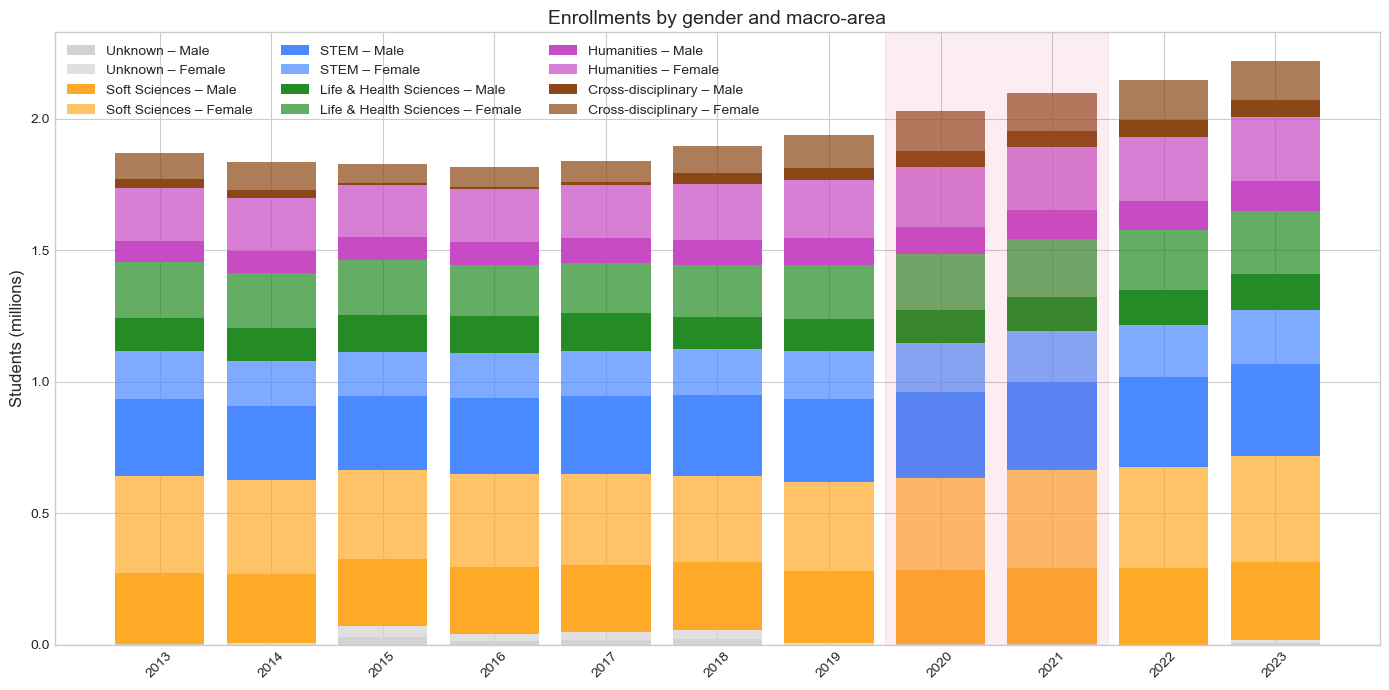

In [77]:
enr_plot = (
    df_enr_final
    .groupby(["year", "sex", "macro_area"], as_index=False)
    .agg({"enrolled": "sum"})
)

fig, ax = plt.subplots(figsize=(14, 7))
bottom = {y: 0 for y in ALL_YEARS}

for area in AREAS:
    print(area )
    for sex in ["Male", "Female"]:
        subset = (
            enr_plot[
                (enr_plot["macro_area"] == area) &
                (enr_plot["sex"] == sex)
            ]
            .set_index("year")
            .reindex(ALL_YEARS, fill_value=0)
        )

        ax.bar(
            ALL_YEARS,
            subset["enrolled"] / Y_SCALE,
            bottom=[bottom[y] for y in ALL_YEARS],
            color=COLOR_AREA[area],
            alpha=0.99 if sex == "Male" else 0.7,
            label=f"{area} – {sex}"
        )

        for y in ALL_YEARS:
            bottom[y] += subset.loc[y, "enrolled"] / Y_SCALE

ax.axvspan(2020 - 0.5, 2021 + 0.5, 
           color="#E75480",
           alpha=0.1)

ax.set_xticks(ALL_YEARS)
ax.set_xticklabels(ALL_YEARS, rotation=45)
ax.set_ylabel("Students (millions)")
ax.set_title("Enrollments by gender and macro-area")
ax.legend(ncol=3)

plt.tight_layout()
plt.show()


#### 6.2 Graduates: stacked by gender and macro-area

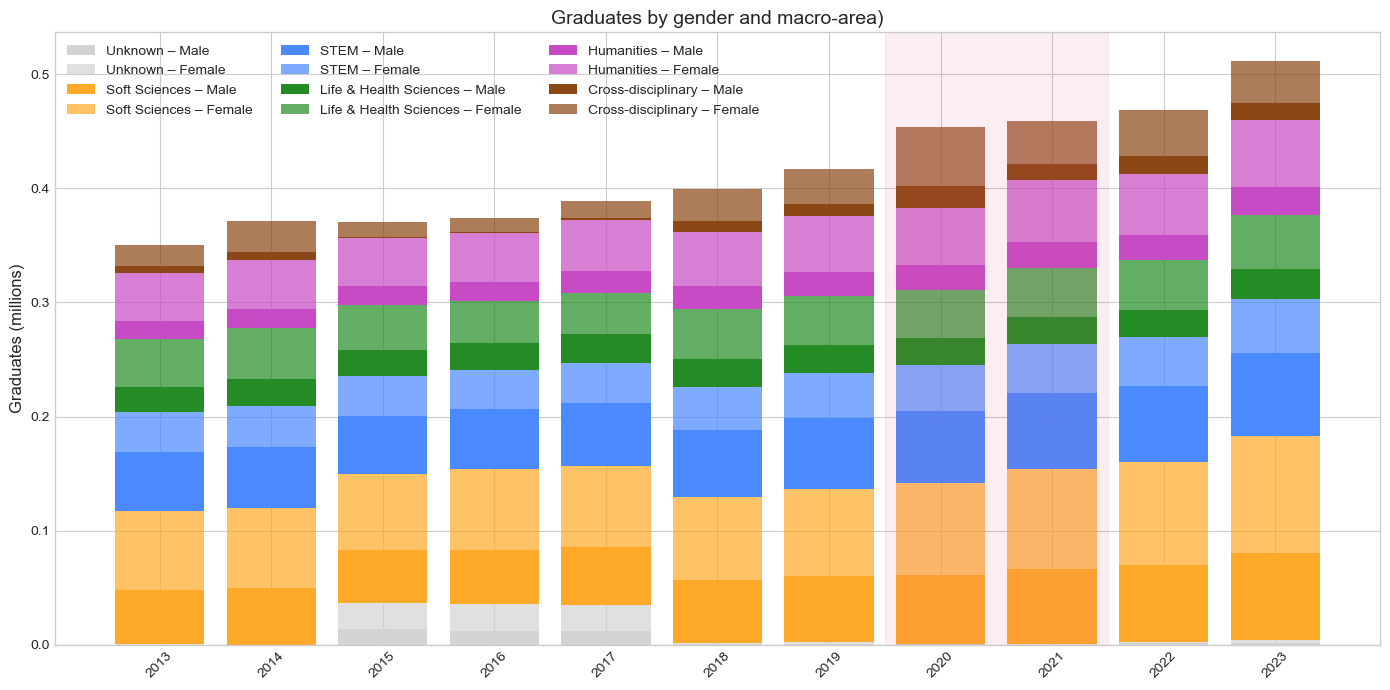

In [86]:
grad_plot = (
    df_grad_final[
        df_grad_final["isced11_code"].isin(["ED5", "ED6", "ED7", "ED8"])
    ]
    .groupby(["year", "sex", "macro_area"], as_index=False)
    .agg({"graduated": "sum"})
)

fig, ax = plt.subplots(figsize=(14, 7))
bottom = {y: 0 for y in ALL_YEARS}

for area in AREAS:
    for sex in ["Male", "Female"]:
        subset = (
            grad_plot[
                (grad_plot["macro_area"] == area) &
                (grad_plot["sex"] == sex)
            ]
            .set_index("year")
            .reindex(ALL_YEARS, fill_value=0)
        )

        ax.bar(
            ALL_YEARS,
            subset["graduated"] / Y_SCALE,
            bottom=[bottom[y] for y in ALL_YEARS],
            color=COLOR_AREA[area],
            alpha=0.99 if sex == "Male" else 0.7,
            label=f"{area} – {sex}"
        )

        for y in ALL_YEARS:
            bottom[y] += subset.loc[y, "graduated"] / Y_SCALE

ax.axvspan(2020 - 0.5, 2021 + 0.5, 
           color="#E75480", 
           alpha=0.1)

ax.set_xticks(ALL_YEARS)
ax.set_xticklabels(ALL_YEARS, rotation=45)
ax.set_ylabel("Graduates (millions)")
ax.set_title("Graduates by gender and macro-area)")
ax.legend(ncol=3)

plt.tight_layout()
plt.show()


#### 6.3 Enrolled (+) vs Graduated (−), by gender

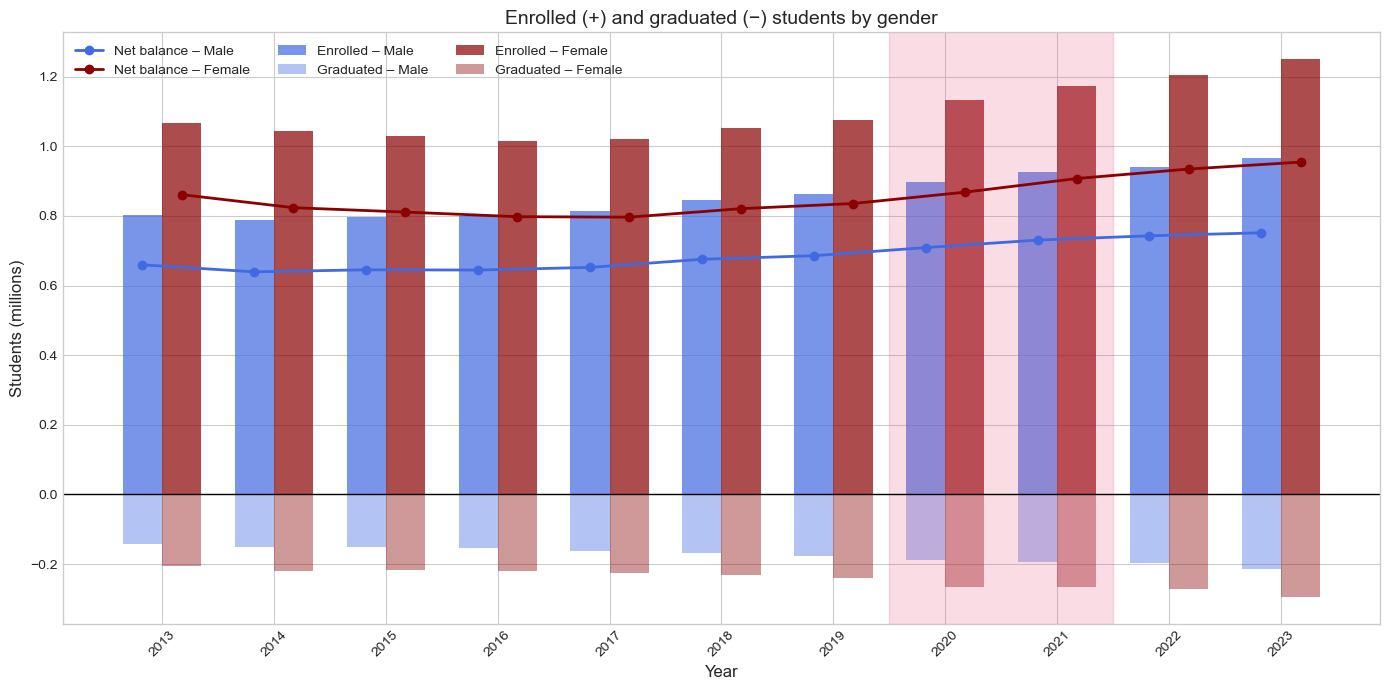

In [79]:
enr_gender = (
    df_enr_final
    .groupby(["year", "sex"], as_index=False)
    .agg({"enrolled": "sum"})
)

grad_gender = (
    df_grad_final
    .groupby(["year", "sex"], as_index=False)
    .agg({"graduated": "sum"})
)

balance = (
    enr_gender
    .merge(grad_gender, on=["year", "sex"], how="left")
    .fillna(0)
)

balance["net_balance"] = balance["enrolled"] - balance["graduated"]

fig, ax = plt.subplots(figsize=(14, 7))

bar_width = 0.35
x = np.arange(len(ALL_YEARS))

for i, sex in enumerate(["Male", "Female"]):
    subset = balance[balance["sex"] == sex].set_index("year").reindex(ALL_YEARS)

    ax.bar(
        x + (i - 0.5) * bar_width,
        subset["enrolled"] / Y_SCALE,
        width=bar_width,
        color=COLOR_SEX[sex],
        alpha=0.7,
        label=f"Enrolled – {sex}"
    )

    ax.bar(
        x + (i - 0.5) * bar_width,
        -subset["graduated"] / Y_SCALE,
        width=bar_width,
        color=COLOR_SEX[sex],
        alpha=0.4,
        label=f"Graduated – {sex}"
    )

    # Balance line
    ax.plot(
        x + (i - 0.5) * bar_width,
        subset["net_balance"] / Y_SCALE,
        color=COLOR_SEX[sex],
        linewidth=2,
        marker="o",
        label=f"Net balance – {sex}"
    )

# Zero line
ax.axhline(0, color="black", linewidth=1)

# Highlight COVID
ax.axvspan(
    ALL_YEARS.index(2020) - 0.5,
    ALL_YEARS.index(2021) + 0.5,
    color="#E75480",
    alpha=0.2
)

ax.set_xticks(x)
ax.set_xticklabels(ALL_YEARS, rotation=45)

ax.set_title("Enrolled (+) and graduated (−) students by gender")
ax.set_xlabel("Year")
ax.set_ylabel("Students (millions)")
ax.legend(ncol=3)

plt.tight_layout()
plt.show()


#### 6.3.1 Enrolled (+) vs Graduated (−), by macro-area

In [80]:
ALL_YEARS = sorted(df_enr_final["year"].unique())
Y_SCALE = 1e6

enr_ma = (
    df_enr_final
    .groupby(["year", "sex", "macro_area"], as_index=False)
    .agg({"enrolled": "sum"})
)

grad_ma = (
    df_grad_final
    .groupby(["year", "sex", "macro_area"], as_index=False)
    .agg({"graduated": "sum"})
)

balance_ma = (
    enr_ma
    .merge(grad_ma, on=["year", "sex", "macro_area"], how="left")
    .fillna(0)
)

balance_ma["net_balance"] = (
    balance_ma["enrolled"] - balance_ma["graduated"]
)


In [81]:
def plot_inflow_outflow_by_macro_area(df, macro_area):

    fig, ax = plt.subplots(figsize=(14, 7))

    bar_width = 0.35
    x = np.arange(len(ALL_YEARS))

    for i, sex in enumerate(["Male", "Female"]):

        subset = (
            df[
                (df["macro_area"] == macro_area) &
                (df["sex"] == sex)
            ]
            .set_index("year")
            .reindex(ALL_YEARS)
            .fillna(0)
        )

        # Enrolled (+)
        ax.bar(
            x + (i - 0.5) * bar_width,
            subset["enrolled"] / Y_SCALE,
            width=bar_width,
            color=COLOR_SEX[sex],
            alpha=0.7,
            label=f"Enrolled – {sex}"
        )

        # Graduated (-)
        ax.bar(
            x + (i - 0.5) * bar_width,
            -subset["graduated"] / Y_SCALE,
            width=bar_width,
            color=COLOR_SEX[sex],
            alpha=0.4,
            label=f"Graduated – {sex}"
        )

        # Balance line
        ax.plot(
            x + (i - 0.5) * bar_width,
            subset["net_balance"] / Y_SCALE,
            color=COLOR_SEX[sex],
            marker="o",
            linewidth=2,
            label=f"Net balance – {sex}"
        )

    # Zero line
    ax.axhline(0, color="black", linewidth=1)

    # Highlight COVID
    ax.axvspan(
        ALL_YEARS.index(2020) - 0.5,
        ALL_YEARS.index(2021) + 0.5,
        color="#E75480",
        alpha=0.2
    )

    ax.set_xticks(x)
    ax.set_xticklabels(ALL_YEARS, rotation=45)
    ax.set_ylabel("Students (millions)")
    ax.set_xlabel("Year")

    ax.set_title(
        f"Enrolled (+) vs Graduated (−) – {macro_area}"
    )

    ax.legend(ncol=3)
    plt.tight_layout()
    plt.show()


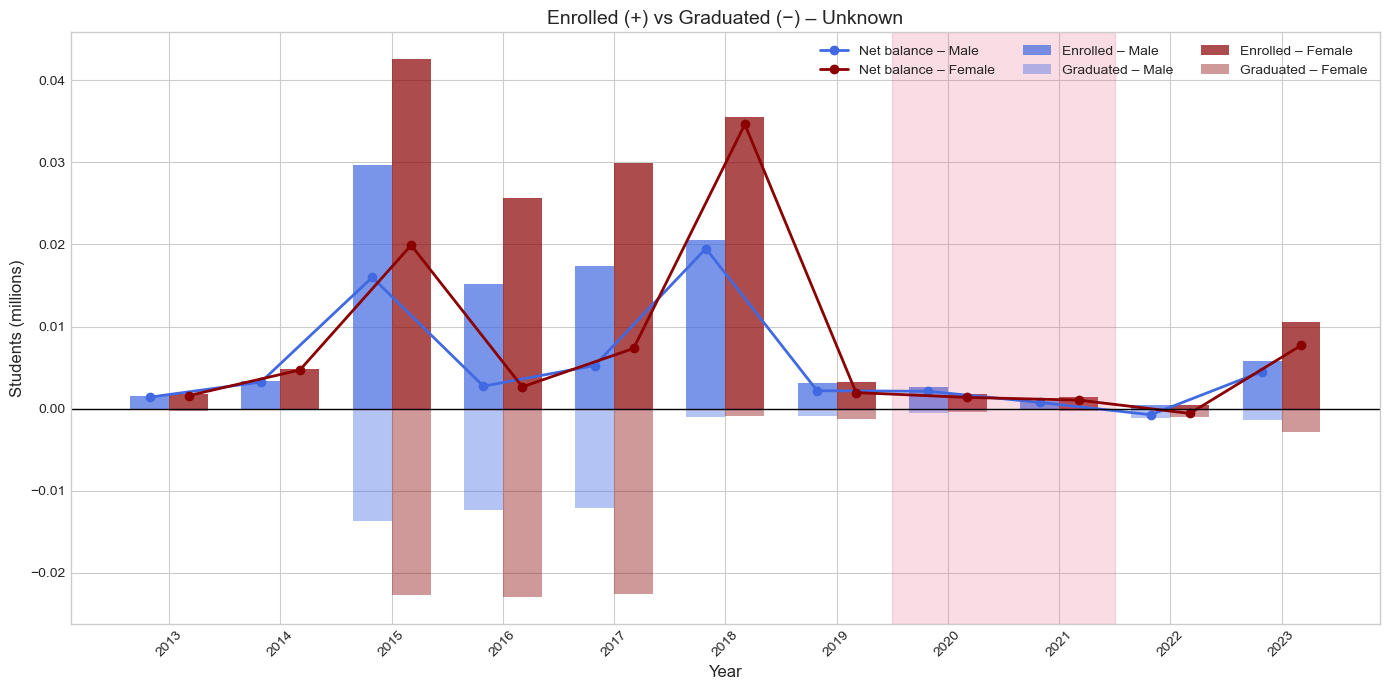

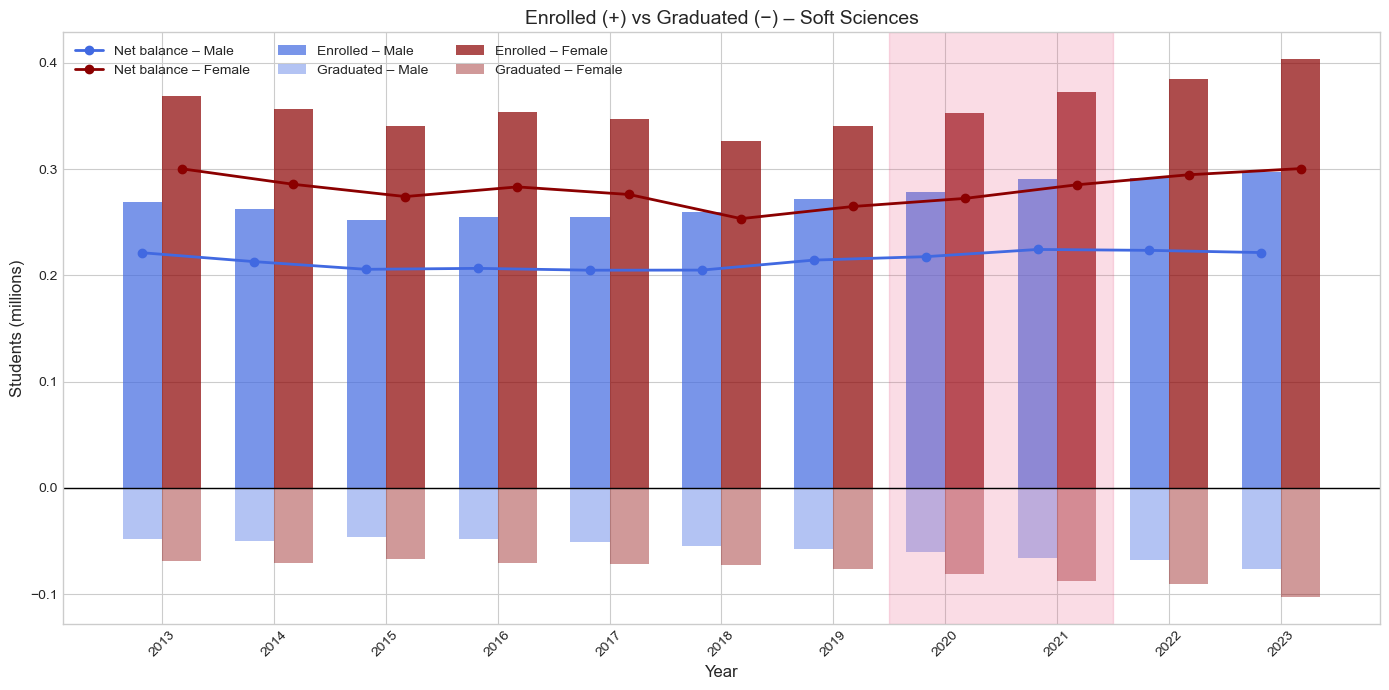

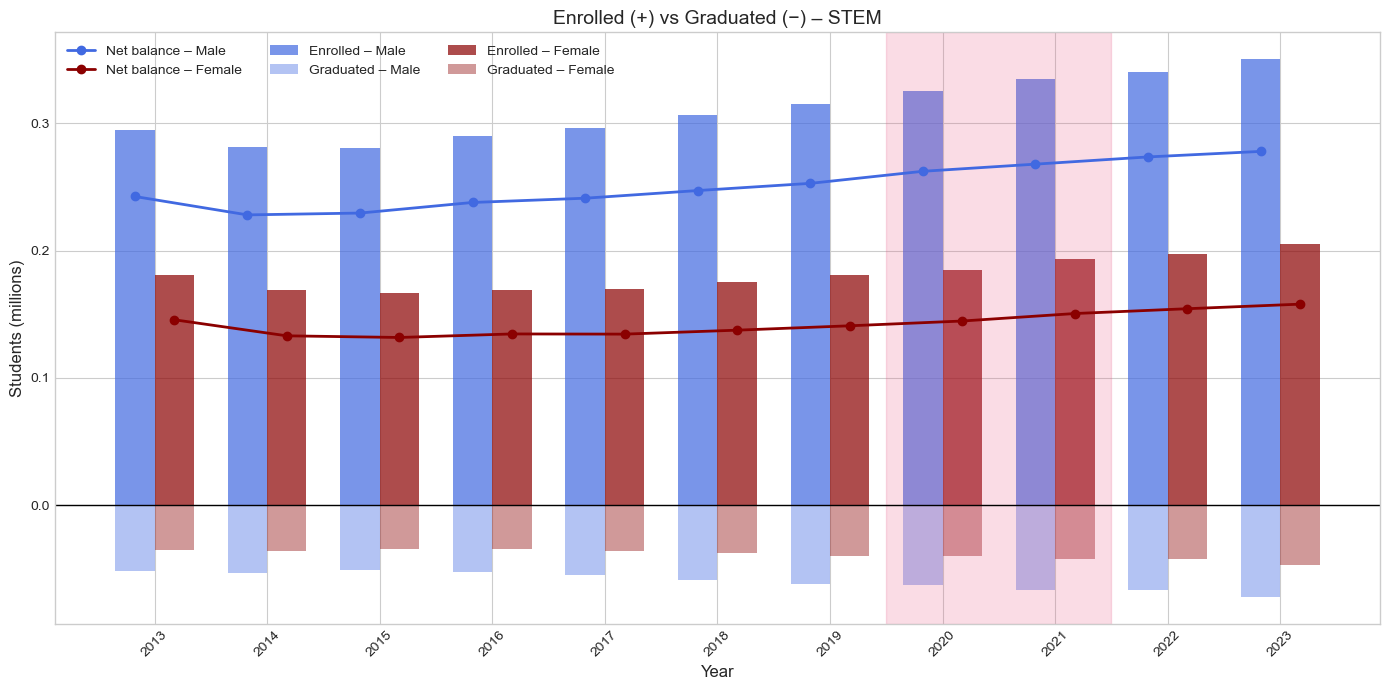

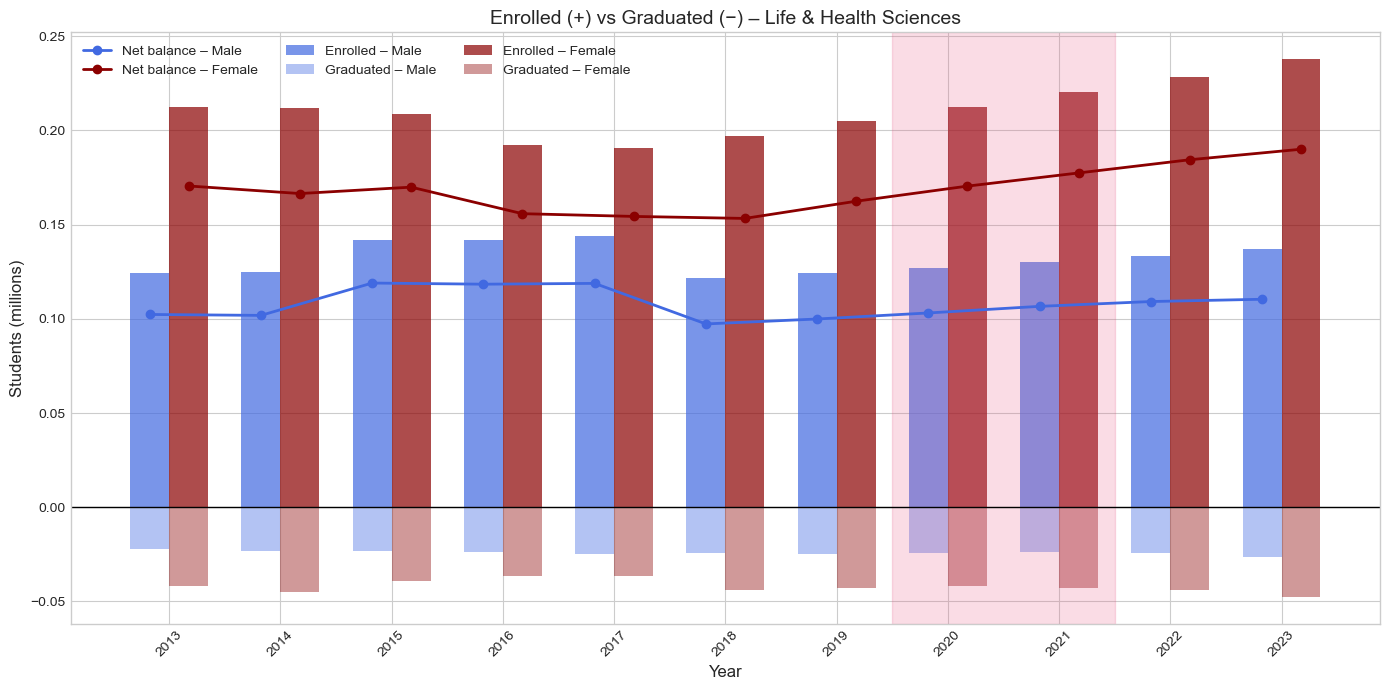

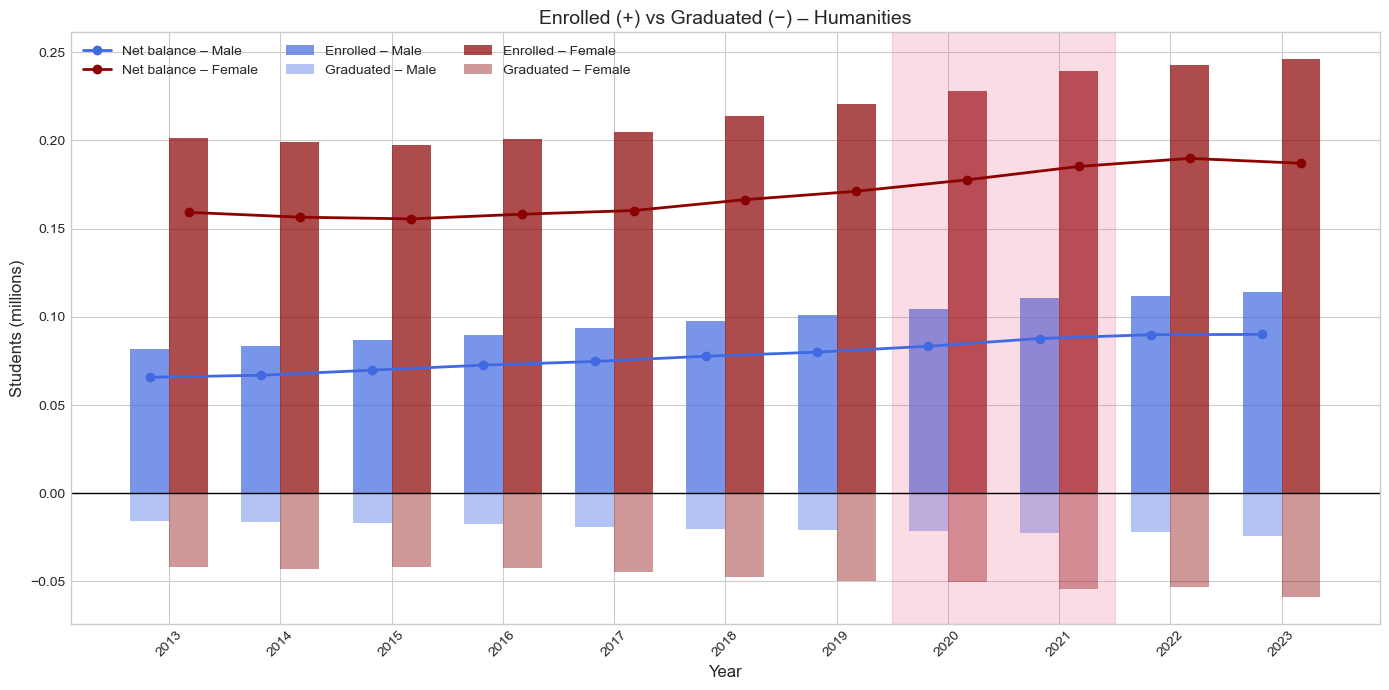

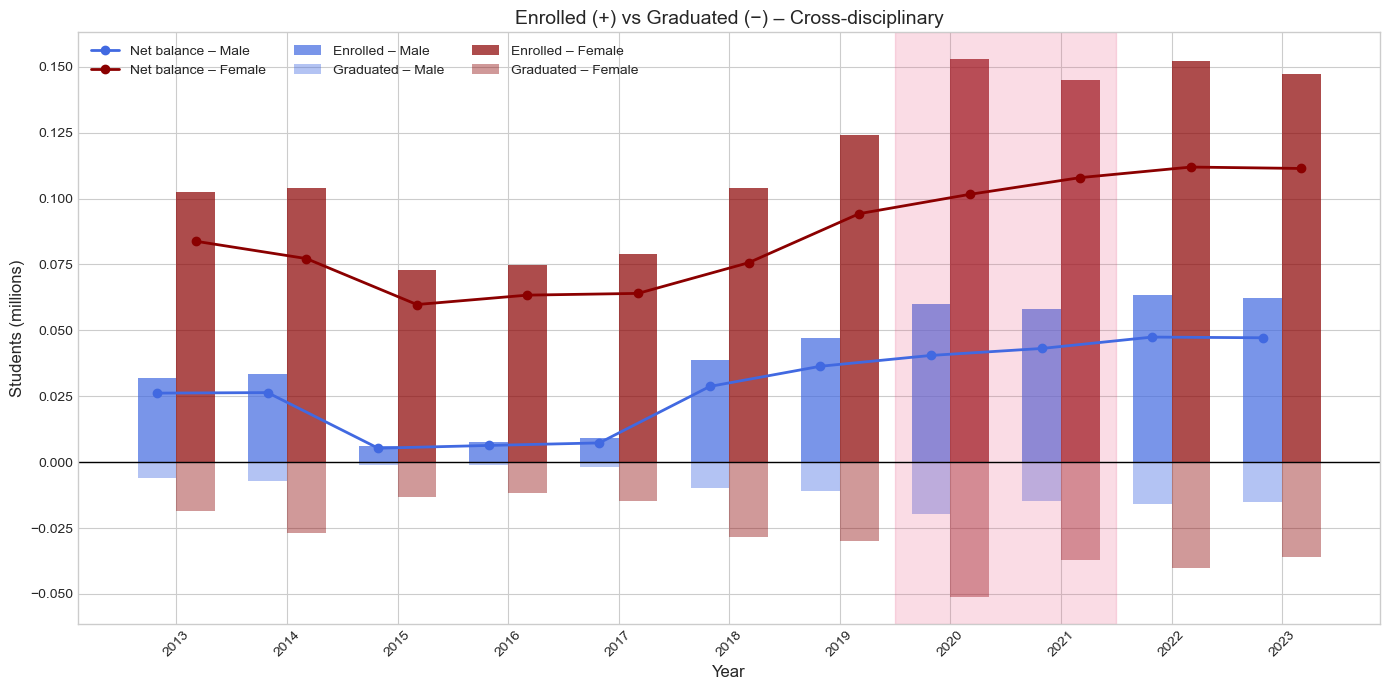

In [82]:
for area in AREAS:
    plot_inflow_outflow_by_macro_area(balance_ma, area)


#### 6.3.2 Enrolled (+) vs Graduated (−), by macro-area, stacked by subarea

In [83]:
enr_sub_ma = (
    df_enr_final
    .groupby(["year", "sex", "macro_area", "iscedf13_code"], as_index=False)
    .agg({"enrolled": "sum"})
)

grad_sub_ma = (
    df_grad_final
    .groupby(["year", "sex", "macro_area", "iscedf13_code"], as_index=False)
    .agg({"graduated": "sum"})
)

balance_sub_ma = (
    enr_sub_ma
    .merge(
        grad_sub_ma,
        on=["year", "sex", "macro_area", "iscedf13_code"],
        how="left"
    )
    .fillna(0)
)

balance_sub_ma["net_balance"] = (
    balance_sub_ma["enrolled"] - balance_sub_ma["graduated"]
)

SUB_ORDER = (
    balance_sub_ma["iscedf13_code"]
    .dropna()
    .sort_values()
    .unique()
)

STACK_COLOR = {
    "F00": "darkgrey",   # Generic programmes and qualifications
    "F01": "goldenrod",   # Education
    "F02": "orange",   # Arts and humanities
    "F03": "crimson",   # Social sciences, journalism and information
    "F04": "skyblue",        # Business, administration and law
    "F05": "seagreen",   # Natural sciences, mathematics and statistics
    "F06": "darkorchid",   # ICTs
    "F07": "cornflowerblue",   # Engineering, manufacturing and construction
    "F08": "forestgreen",        # Agriculture, forestry, fisheries and veterinary
    "F09": "steelblue",   # Health and welfare
    "F10": "teal",         # Services
    "UNK": "grey"        # Unknown
}

In [84]:
def plot_inflow_outflow_stack_subareas(balance_df, macro_area):

    fig, ax = plt.subplots(figsize=(14, 7))

    bar_width = 0.35
    x = np.arange(len(ALL_YEARS))

    # Get ordered sub-areas for the macro-area
    sub_areas = (
        balance_df[
            balance_df["macro_area"] == macro_area
        ]["iscedf13_code"]
        .dropna()
        .sort_values()
        .unique()
    )

    for i, sex in enumerate(["Male", "Female"]):

        sex_df = balance_df[
            (balance_df["macro_area"] == macro_area) &
            (balance_df["sex"] == sex)
        ]

        # ENROLLED (+)
        bottom_pos = np.zeros(len(ALL_YEARS))

        for sub in sub_areas:

            enrolled_ts = (
                sex_df[sex_df["iscedf13_code"] == sub]
                .set_index("year")["enrolled"]
                .reindex(ALL_YEARS)
                .fillna(0)
            )

            ax.bar(
                x + (i - 0.5) * bar_width,
                enrolled_ts / Y_SCALE,
                width=bar_width,
                bottom=bottom_pos,
                color=STACK_COLOR[sub],
                alpha=0.9,
                label=sub if sex == "Male" else None
            )

            bottom_pos += enrolled_ts / Y_SCALE

        # GRADUATED (-)
        bottom_neg = np.zeros(len(ALL_YEARS))

        for sub in sub_areas:

            graduated_ts = (
                sex_df[sex_df["iscedf13_code"] == sub]
                .set_index("year")["graduated"]
                .reindex(ALL_YEARS)
                .fillna(0)
            )

            ax.bar(
                x + (i - 0.5) * bar_width,
                -graduated_ts / Y_SCALE,
                width=bar_width,
                bottom=-bottom_neg,
                color=STACK_COLOR[sub],
                alpha=0.6
            )

            bottom_neg += graduated_ts / Y_SCALE

        # Balance line
        balance_ts = (
            sex_df
            .groupby("year")["net_balance"]
            .sum()
            .reindex(ALL_YEARS)
            .fillna(0)
        )

        ax.plot(
            x + (i - 0.5) * bar_width,
            balance_ts / Y_SCALE,
            color=COLOR_SEX[sex],
            marker="o",
            linewidth=2.5,
            label=f"Net balance – {sex}"
        )

    # Zero line
    ax.axhline(0, color="black", linewidth=1)

    # Highlight COVID
    ax.axvspan(
        ALL_YEARS.index(2020) - 0.5,
        ALL_YEARS.index(2021) + 0.5,
        color="#E75480",
        alpha=0.15
    )

    # Axes
    ax.set_xticks(x)
    ax.set_xticklabels(ALL_YEARS, rotation=45)
    ax.set_ylabel("Students (millions)")
    ax.set_xlabel("Year")

    ax.set_title(
        f"Enrolled (+) vs Graduated (−) with Sub-area Composition – {macro_area}"
    )

    ax.legend(
        title="Sub-areas (stack) & Net balance (lines)",
        ncol=3,
        fontsize=9
    )

    plt.tight_layout()
    plt.show()


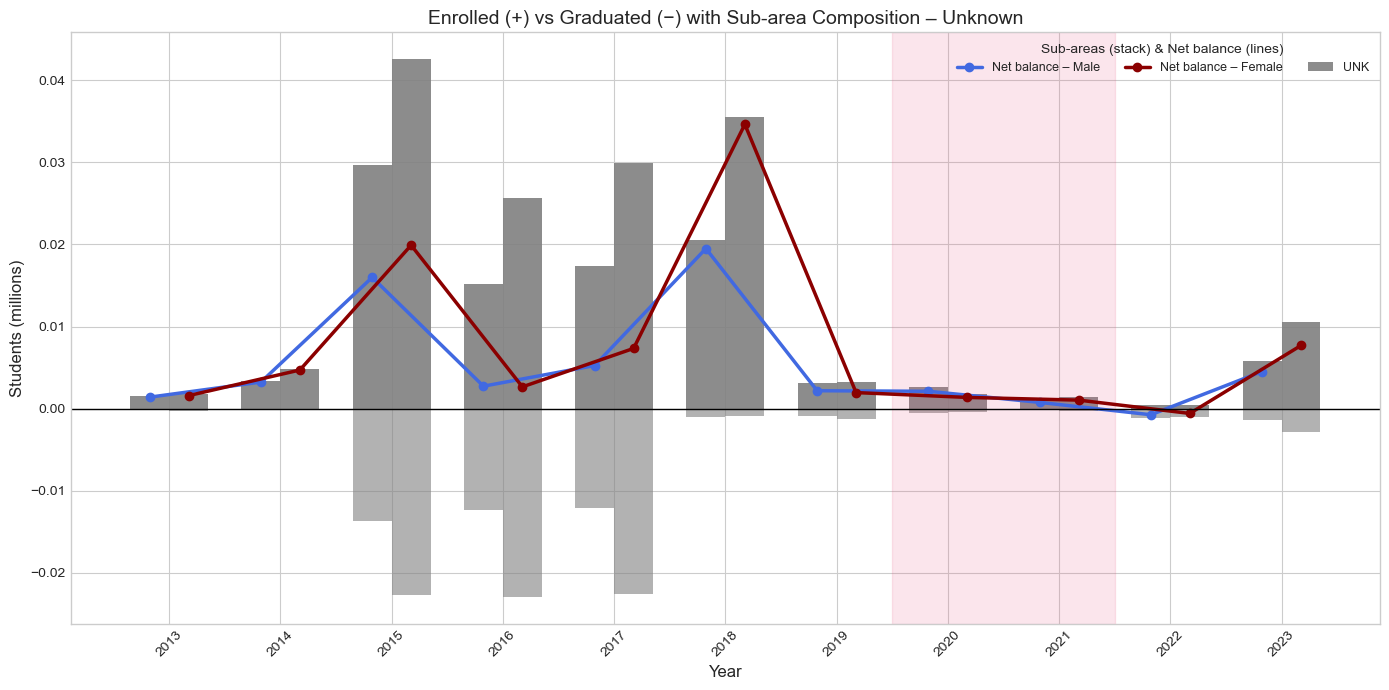

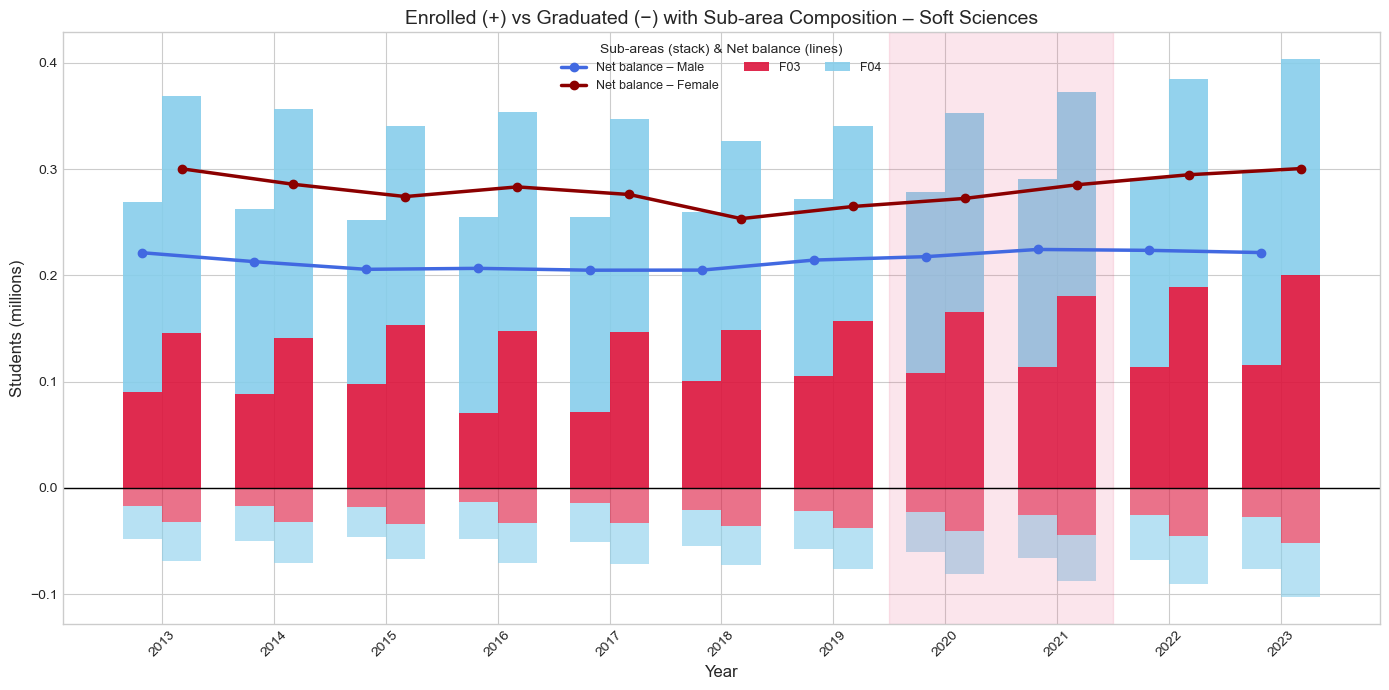

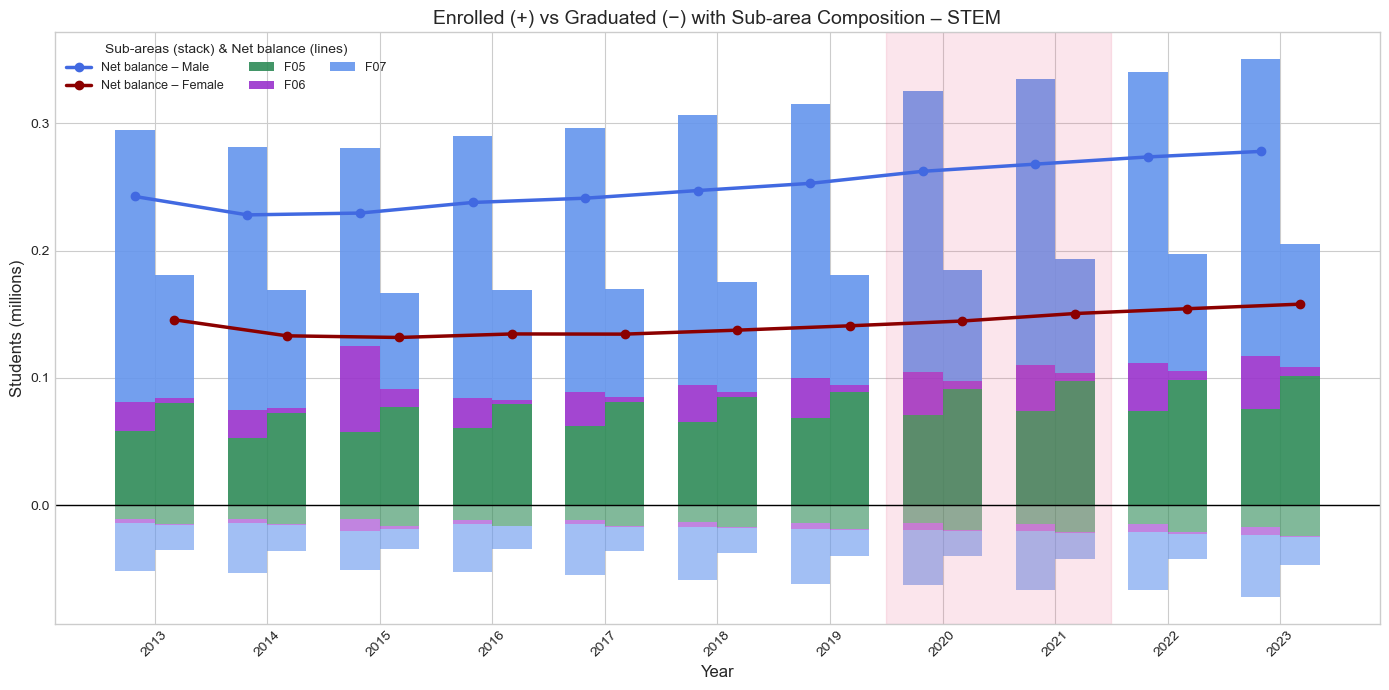

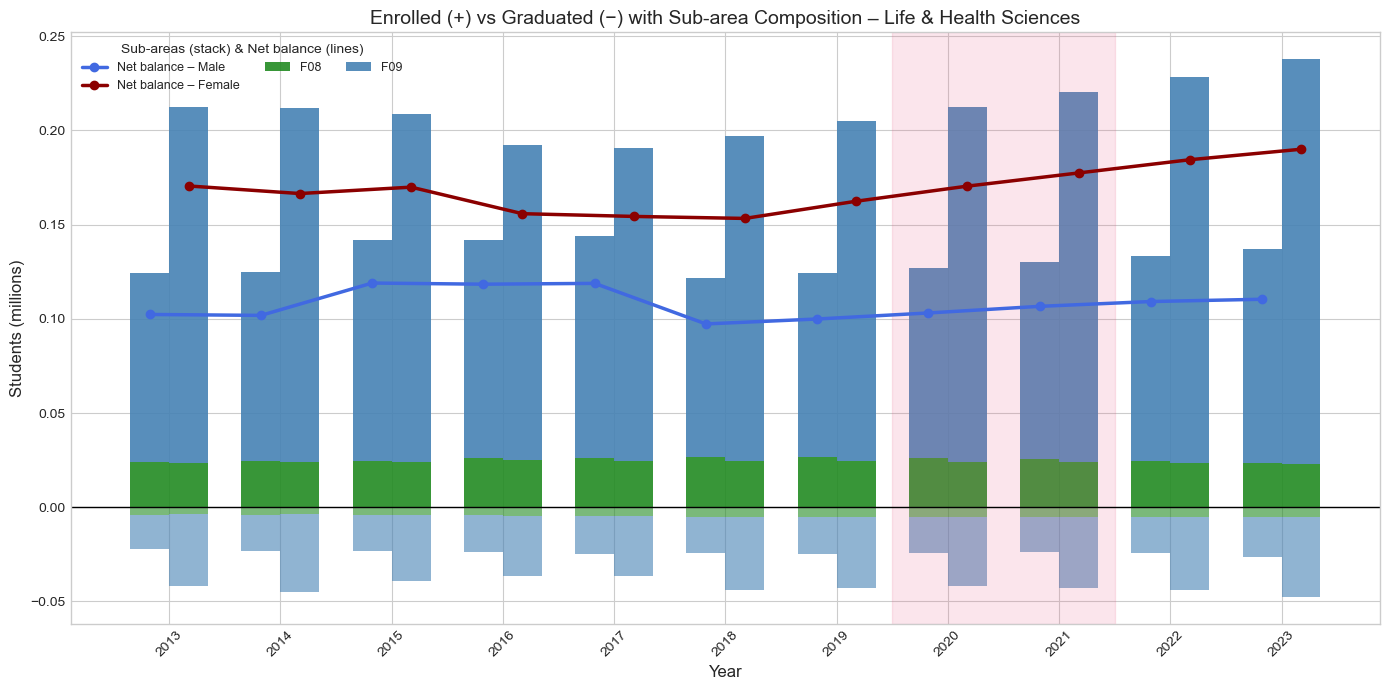

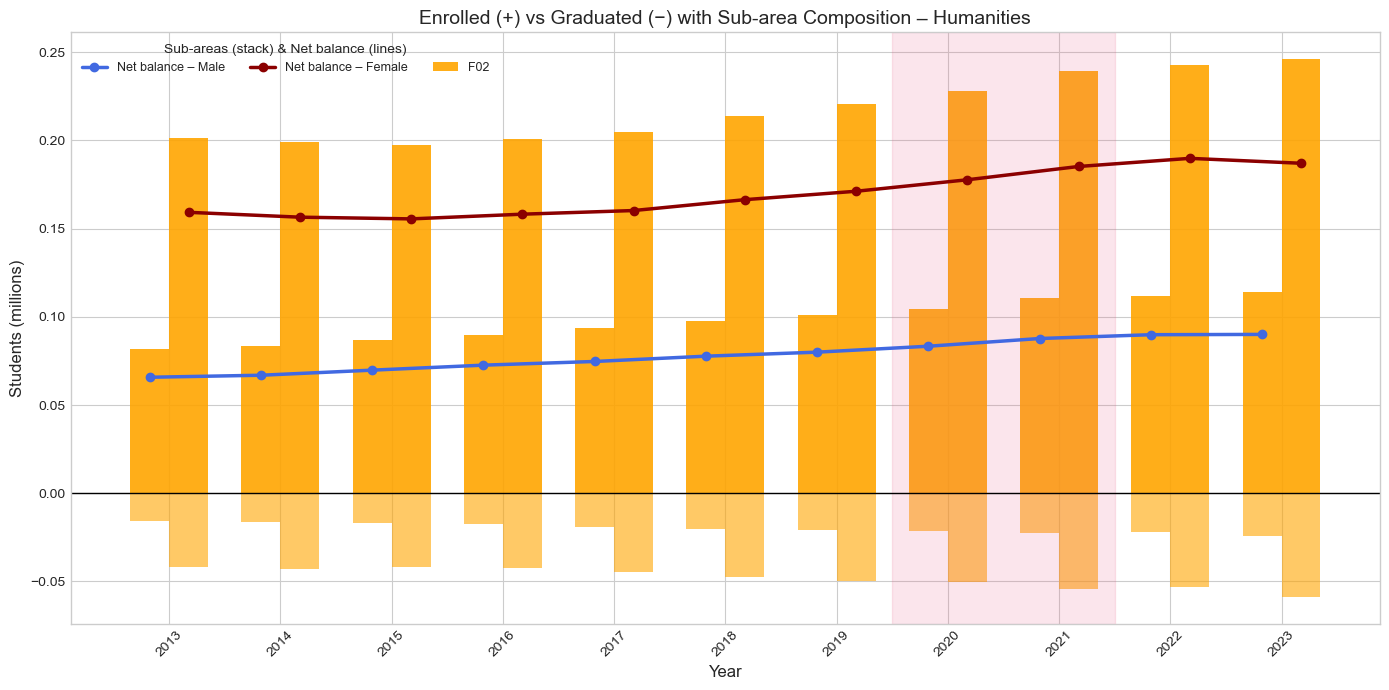

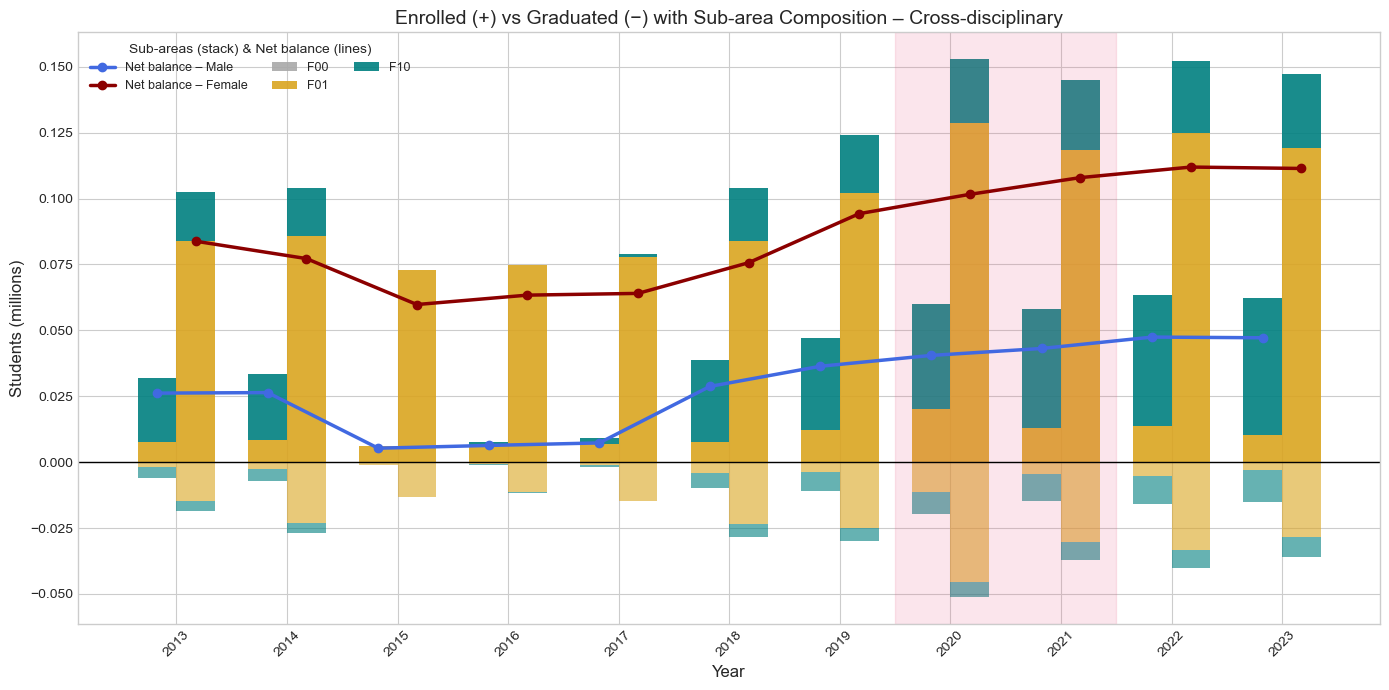

In [85]:
for area in AREAS:
    plot_inflow_outflow_stack_subareas(balance_sub_ma, area)
